In [1]:
import os,sys
import json
import torch

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [2]:
from src.model import TwoLayerConvGRUNet
from src.utils import plot_history_epoch_curves
from src.train import train_loop

In [3]:
# 构建数据集
from torch.utils.data import DataLoader,Subset
from src.dataset import build_global_vocab_and_maxcount, CLEVRMultiLabelByImage

clevr_root = "../CLEVR_v1.0"

# 全局统计：colors/shapes/max_objects（train+val+test）
colors, shapes, max_objects, _ = build_global_vocab_and_maxcount(clevr_root, splits=("train","val"))

train_ds = CLEVRMultiLabelByImage(
    clevr_root=clevr_root,
    split="train",
    colors=colors,
    shapes=shapes,
    max_objects=max_objects,
)

val_ds = CLEVRMultiLabelByImage(
    clevr_root=clevr_root,
    split="val",
    colors=colors,
    shapes=shapes,
    max_objects=max_objects,
)

# 取前 N 个样本（最快、可复现）
N = 2000
train_ds_small = Subset(train_ds, list(range(N)))
val_ds_small = Subset(val_ds, list(range(N)))

train_dl = DataLoader(train_ds, batch_size=100, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=100, shuffle=True, num_workers=0)


In [4]:
model = TwoLayerConvGRUNet(num_classes=8)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 选设备
steps = 3  # 迭代步数
epochs = 8
0  # 训练轮数

history = train_loop(
    model=model,               # 你的 TwoLayerConvGRUNet
    train_loader=train_dl, # 你的 DataLoader
    device=device,             # device
    steps=steps,               # steps
    epochs=epochs,             # epochs
    lr=1e-3,                   # lr
    loss_mode="last",          # 推荐先用 last
    threshold=0.5,             # strict 阈值
    grad_clip_norm=1.0,        # 建议保留
    val_loader=val_dl,           # 没有就 None
)


Epoch 001 | loss=0.2680 | train_acc(t=end)=0.5461
         | val_acc(t=end)=0.7201
Epoch 002 | loss=0.0842 | train_acc(t=end)=0.8510
         | val_acc(t=end)=0.2005
Epoch 003 | loss=0.0391 | train_acc(t=end)=0.9437
         | val_acc(t=end)=0.9461
Epoch 004 | loss=0.0205 | train_acc(t=end)=0.9745
         | val_acc(t=end)=0.5335
Epoch 005 | loss=0.0145 | train_acc(t=end)=0.9814
         | val_acc(t=end)=0.1714
Epoch 006 | loss=0.0105 | train_acc(t=end)=0.9862
         | val_acc(t=end)=0.9691
Epoch 007 | loss=0.0073 | train_acc(t=end)=0.9911
         | val_acc(t=end)=0.2752
Epoch 008 | loss=0.0069 | train_acc(t=end)=0.9903
         | val_acc(t=end)=0.9933


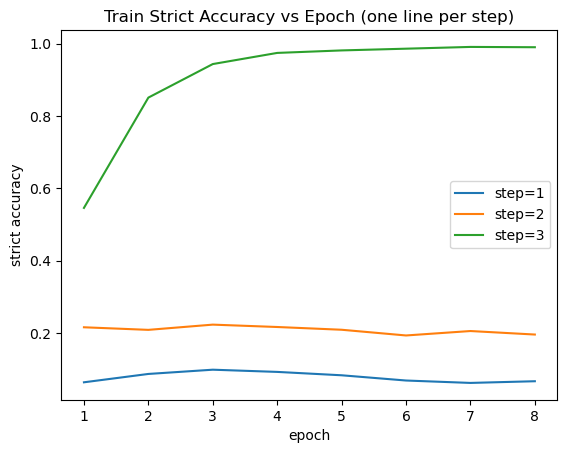

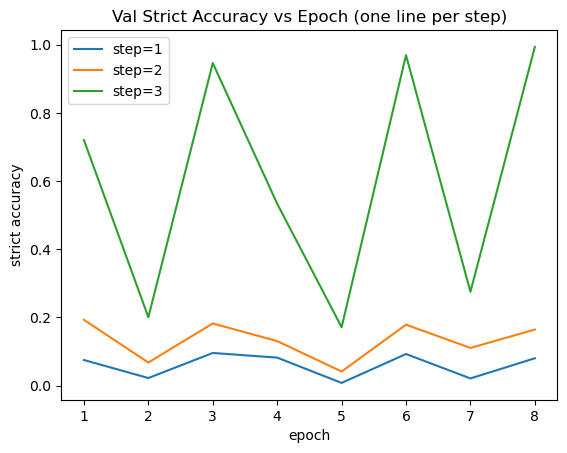

In [6]:
plot_history_epoch_curves(history)